<h2 style='color:blue' align="center">Classification Problem:Decision Tree</h2>

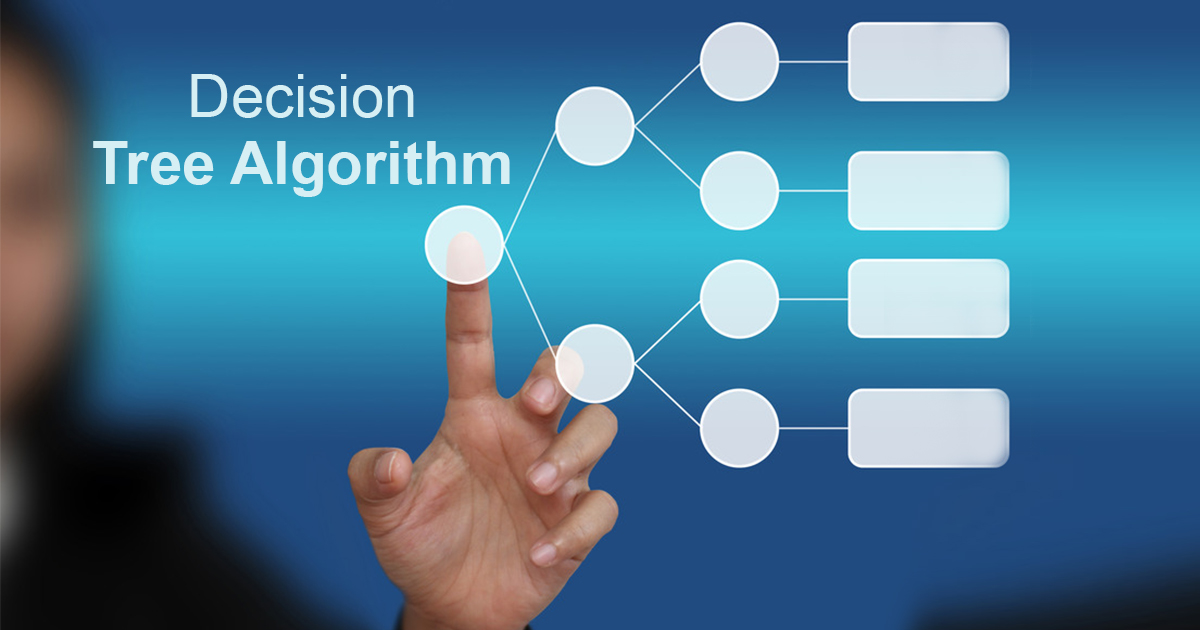

<div style="text-align:justify">When you have a dataset like this it's easier to draw a decision boundry using LogisticRegression.
</div>

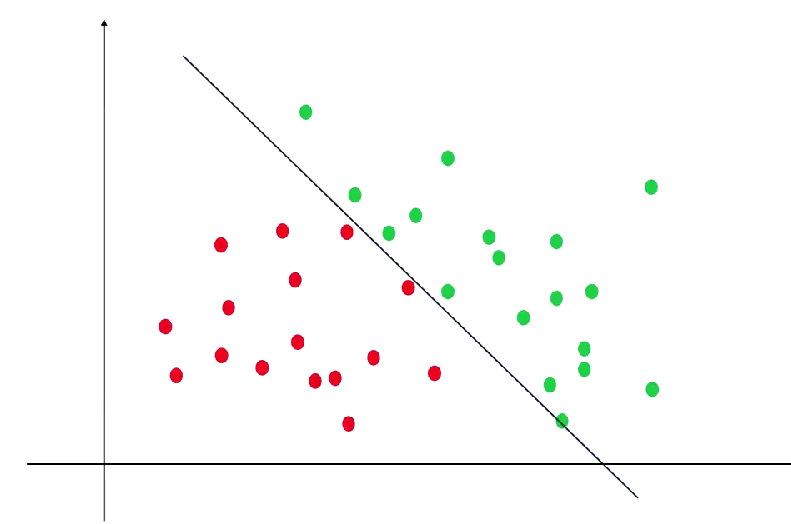

<div style="text-align:justify">But if your dataset is complicate like this you cannot just draw a single line. You might have to split your dataset again and again to come up with the decision boundaries and this is what decision algorithm does for you.    
</div>

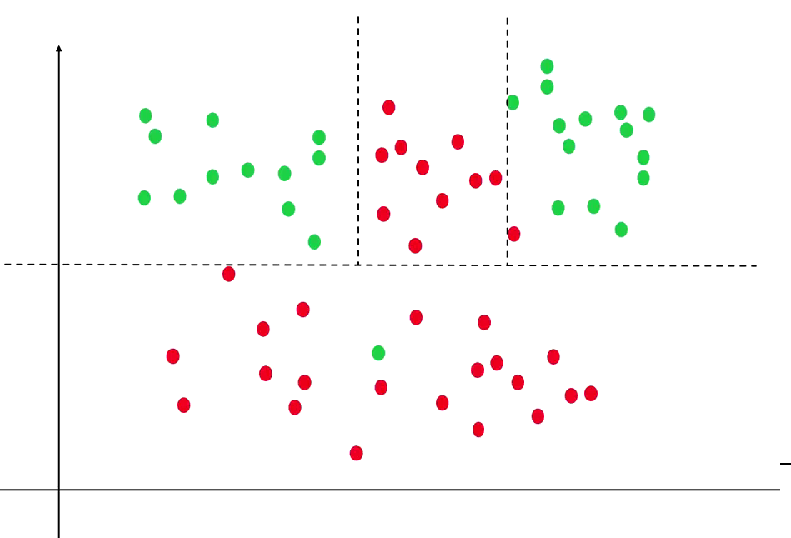

<div style="text-align:justify">Problem: We will use this particular dataset where you try to predict if person salaries more than 100K$ based on the company and the job title and the degree that he has.    
</div>

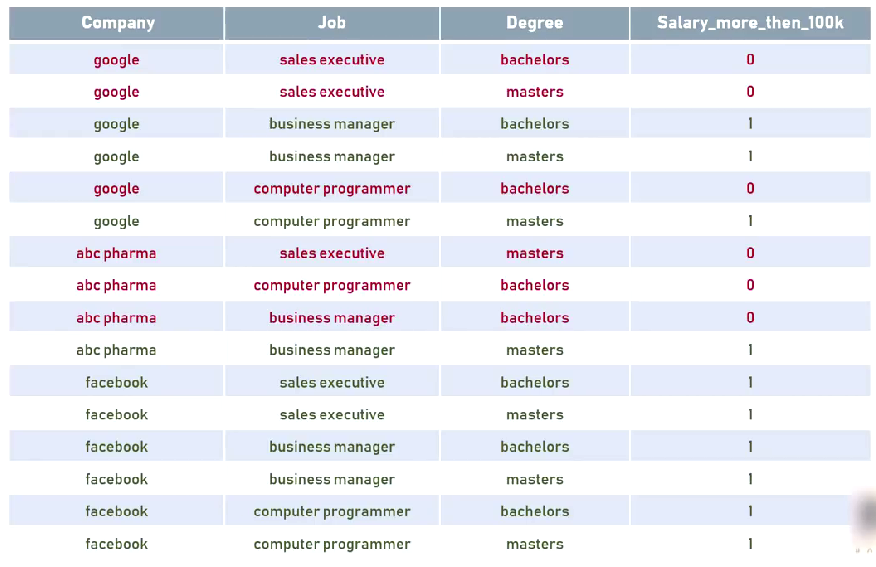

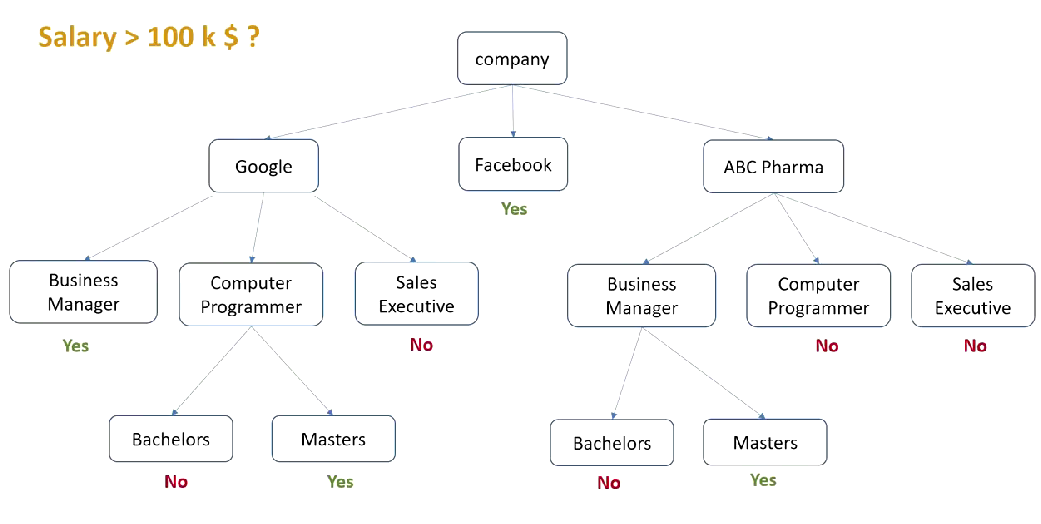

**How do you select ordering of features?**

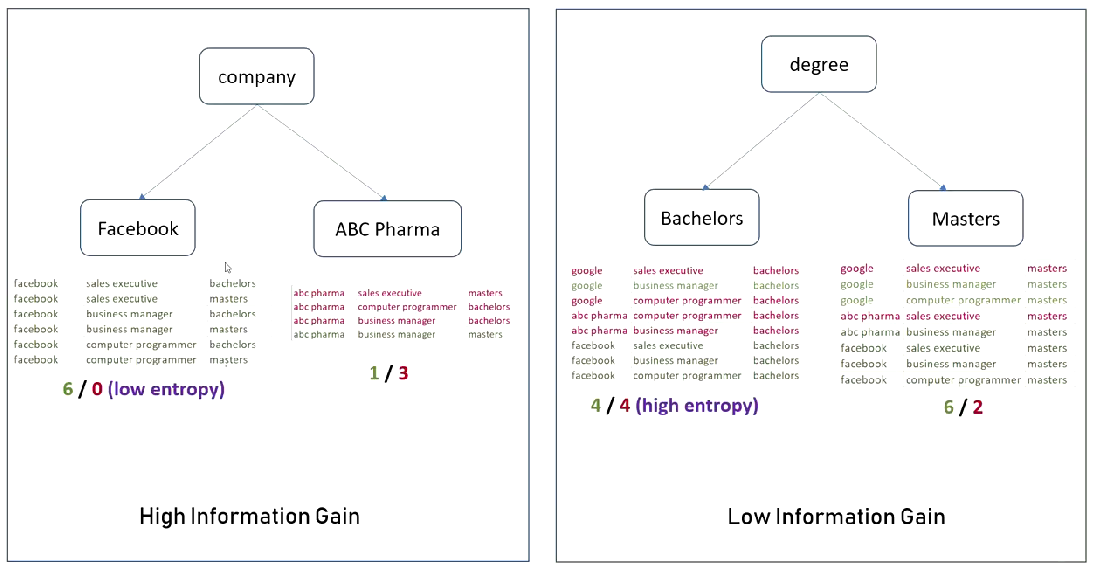

<div style="text-align:justify">entropy is the measure of randomness in your samples. low entropy means there is no randomness. low entropy => High information gain => better choice for ordering features. 
    </div>

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("D:/Data_Science/My Github/Machine-Learning-with-Python/9. Decision_Tree/Example/salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [4]:
# divided my dataframe between independant variable(inputs) & target varibable
inputs = df.drop('salary_more_then_100k',axis='columns')

In [5]:
target = df['salary_more_then_100k']

**ML algorithm can only work on numbers, so we have to converts input columns into numbers. One way to do this in to use LabelEncoder.**

In [6]:
from sklearn.preprocessing import LabelEncoder

**I have 3 columns so I have to create 3 different objects.**

In [7]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

<div style="text-align:justify">Once you have those 3, in your inputs dataframe you are creating 1 more column for each by using fit_transform method to convert them into numbers.</div>

In [8]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

In [9]:
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


Next step is to drop the real columns for just having numbers.

In [10]:
inputs_n = inputs.drop(['company','job','degree'],axis='columns')

In [16]:
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [17]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

train_test_split

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(inputs_n,target,test_size=0.2)

In [20]:
len(X_train)

12

In [21]:
len(X_test)

4

Now we are ready to train our classifier.

In [22]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [24]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
model.score(X_test,y_test)

0.5

This is because the number of data is too small.

## Prediction

**Is salary of Google, Sales executive, Masters degree > 100 k ?**

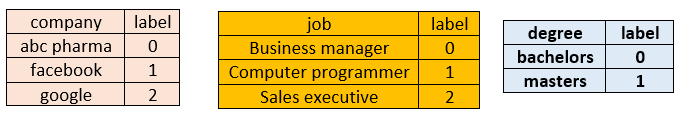

In [27]:
model.predict([[2,2,1]])

array([0], dtype=int64)

It means this person's salary is not greater than 100K.

**Is salary of facebook, business manager, bachelor degree > 100 k ?**

In [28]:
model.predict([[1,0,0]])

array([1], dtype=int64)

It means that this persron's salary > 100K.

|  Date |  Author |   |   |
|---|---|---|---|
| 2021-09-13    |   <font color=blue>**Ehsan Zia**</font>  |  |  |